# Activation Functions

Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable. They introduce non-linear properties to our Network. Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.

Specifically in A-NN we do the sum of products of inputs(X) and their corresponding Weights(W) and apply a Activation function f(x) to it to get the output of that layer and feed it as an input to the next layer.

If we do not apply a Activation function then the output signal would simply be a simple linear function. Linear functions have their use (as shown last time) but they are limited by their simplicity. Non-linear functions help to capture patterns in data that might be too complex for a linear model to recognize.

Also another important feature of a Activation function is that it should be differentiable for backpropagation later.

![y_hat](images/y_hat.png)

### Sigmoid

Sigmoid Activation function: It is a activation function of form f(x) = 1 / 1 + exp(-x) . Its Range is between 0 and 1. It is a S — shaped curve. It is easy to understand and apply but it has major reasons which have made it fall out of popularity -

$$
\sigma (x) = \frac{1}{1+e^{-x}} \newline
\frac{d\sigma (x)}{d(x)} = \sigma (x)\cdot (1-\sigma(x))
$$

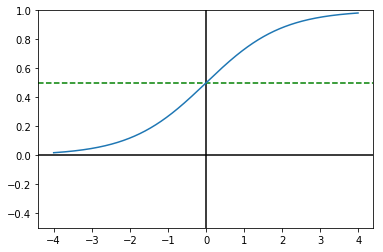

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(-4, 4, 0.01)

def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))
sig = sigmoid_array(x)
plt.axvline(color='black')
plt.axhline(color='black')
plt.axhline(np.median(sig), color = 'g', linestyle = '--')
plt.ylim(-.5, 1)
plt.plot(x, sig)
plt.show()

### Relu

It’s just R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x. Hence as seeing the mathamatical form of this function we can see that it is very simple and efficinent . A lot of times in Machine learning and computer science we notice that most simple and consistent techniques and methods are only preferred and are best. Almost all deep learning Models use ReLu nowadays. But its limitation is that it should only be used within Hidden layers of a Neural Network Model.

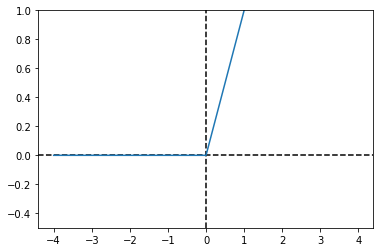

In [46]:
x = np.arange(-4, 4, 0.01)

def relu(x):                                        
    return [max(0,elem) for elem in x]

re = relu(x)
plt.axvline(color='black', linestyle = "--")
plt.axhline(color='black', linestyle = "--")
plt.ylim(-.5, 1)
plt.plot(x, re)
plt.show()

# Loss Functions

In order to monitor our progress and make sure that we are moving in right direction, we should routinely calculate the value of the loss function. Generally speaking, the loss function is designed to show how far we are from the ‘ideal’ solution. It is selected according to the problem we plan to solve, and frameworks such as Pytorch have many options to choose from.


Each of the neural network's weights receives an update proportional to the partial derivative of the loss function with respect to the current weight in each iteration of training

Vanashing Gradient Problem: the gradient will be vanishingly small, effectively preventing the weight from changing its value.

$$
\begin{aligned}
\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})=\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)\newline
f(\mathbf{x}^{(i)},\boldsymbol{\theta}) = \hat{y}^{(i)} \newline
L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta}))=\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2}\newline
\frac{\partial\boldsymbol{\mathcal{L}}}{\partial\boldsymbol{\theta}}=-(y-\sigma(\mathbf{z}))\cdot\sigma’(\mathbf{z})\cdot\mathbf{x}
\end{aligned}
$$

$$
\begin{aligned}
\boldsymbol{\theta}^{*} & =\arg\min_{\boldsymbol{\theta}}\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})+\lambda\cdot\Phi(\boldsymbol{\theta})\newline
& =\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},\hat{y}^{(i)}\big)+\lambda\cdot\Phi(\boldsymbol{\theta})\newline
& =\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)+\lambda\cdot\Phi(\boldsymbol{\theta})
\end{aligned}
$$


# Backpropagation

Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.
In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

So, each iteration of the training process consists of the following steps:
1. Calculating the predicted output ŷ, known as feedforward
2. Updating the weights and biases, known as backpropagation

![backprop](images/backprop.png)